<a href="https://colab.research.google.com/github/Abhay182005dat/Ai_Lab/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('winequalityred.csv')

### Domain Knowledge revise

```
1.   fixed acidity, citric acid, and pH influence the wine's tartness and freshness, which are key to its taste.
2.   Sulphates act as preservatives and affect the wine's microbial stability, while alcohol content often enhances flavor and perceived quality.
3. Knowing that high residual sugar might indicate a sweeter wine and that volatile acidity in excess can cause spoilage helps us better
interpret patterns in the data and decide which features may play a more significant role in predicting wine quality.

```




  

### EDA

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()


#count  Total number of samples (rows in dataset) = **1599**
#mean   Average value of that feature across all wines
#std  Standard deviation — how spread out the data is
#min   Minimum value found in that column
#25%   First quartile (25% of data is below this value)
#50%     Median (middle value)
#75%    Third quartile (75% of data is below this value)
#max     Maximum value found in that column


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


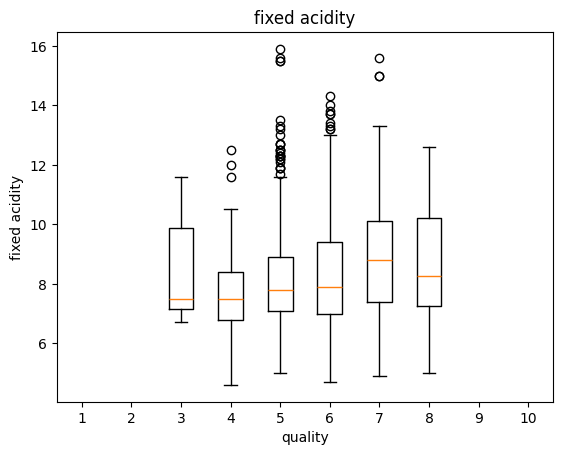

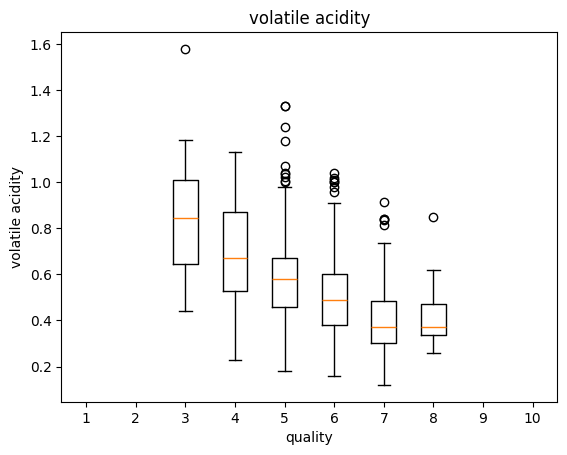

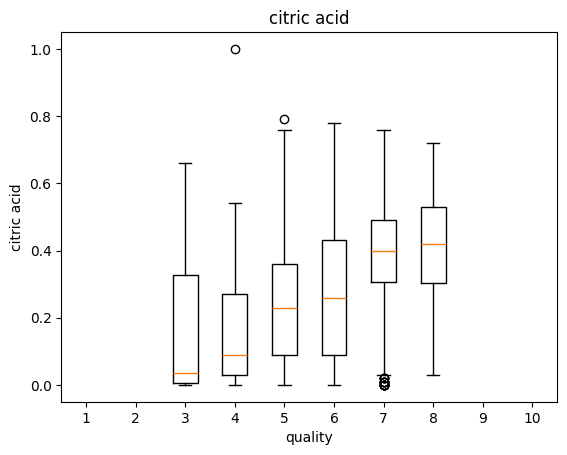

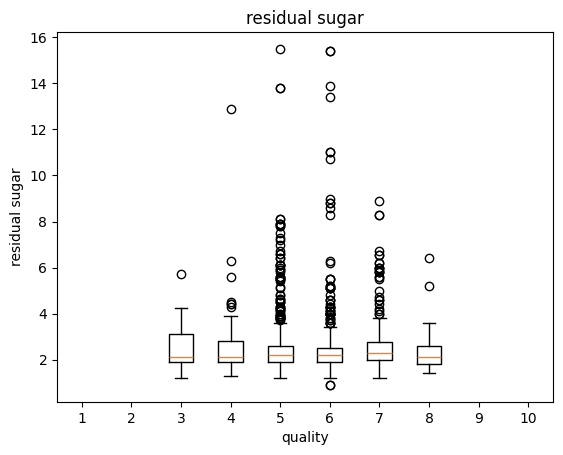

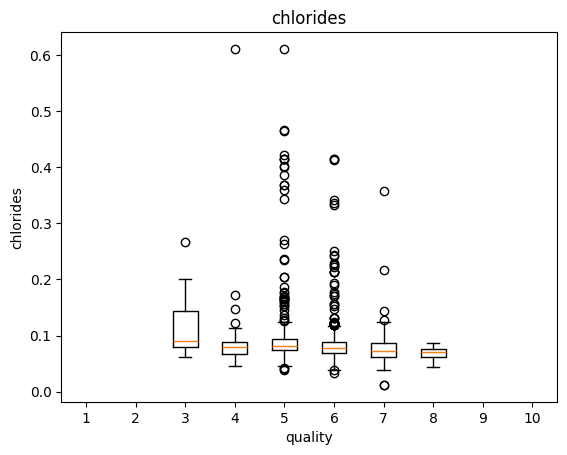

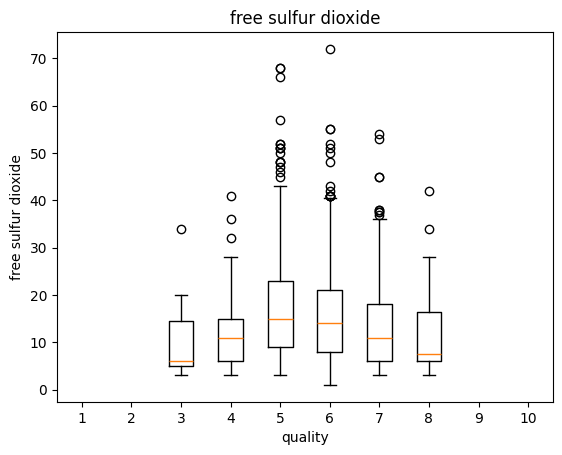

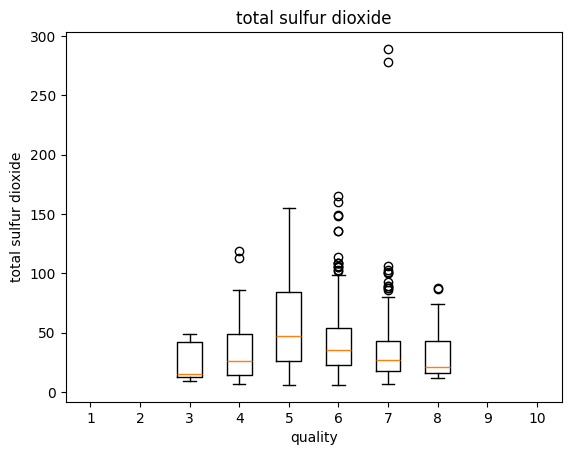

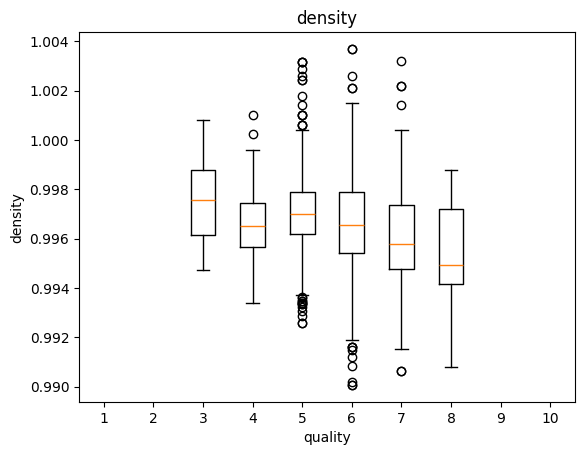

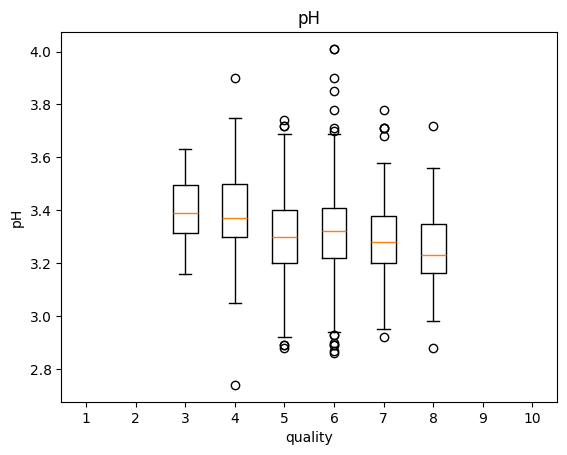

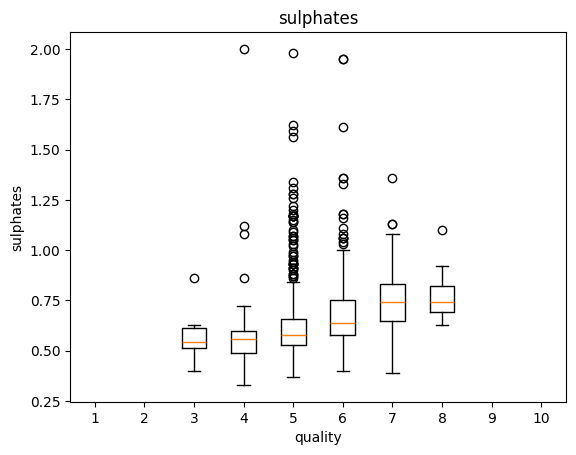

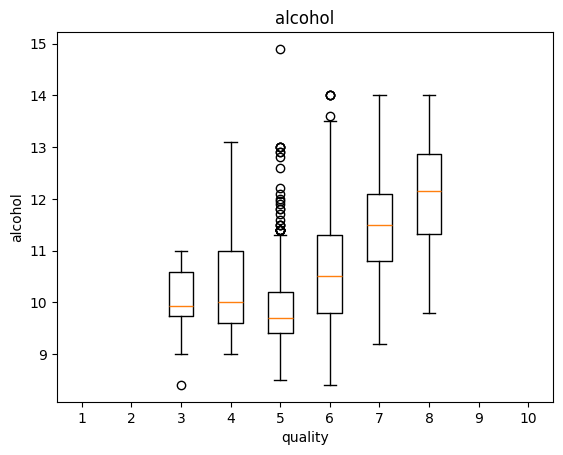

In [6]:
for label in df.columns[:-1]:
  plt.boxplot([df[df['quality'] == i][label] for i in range (1,11) ])
  plt.title(label)
  plt.xlabel('quality')
  plt.ylabel(label)
  plt.show()

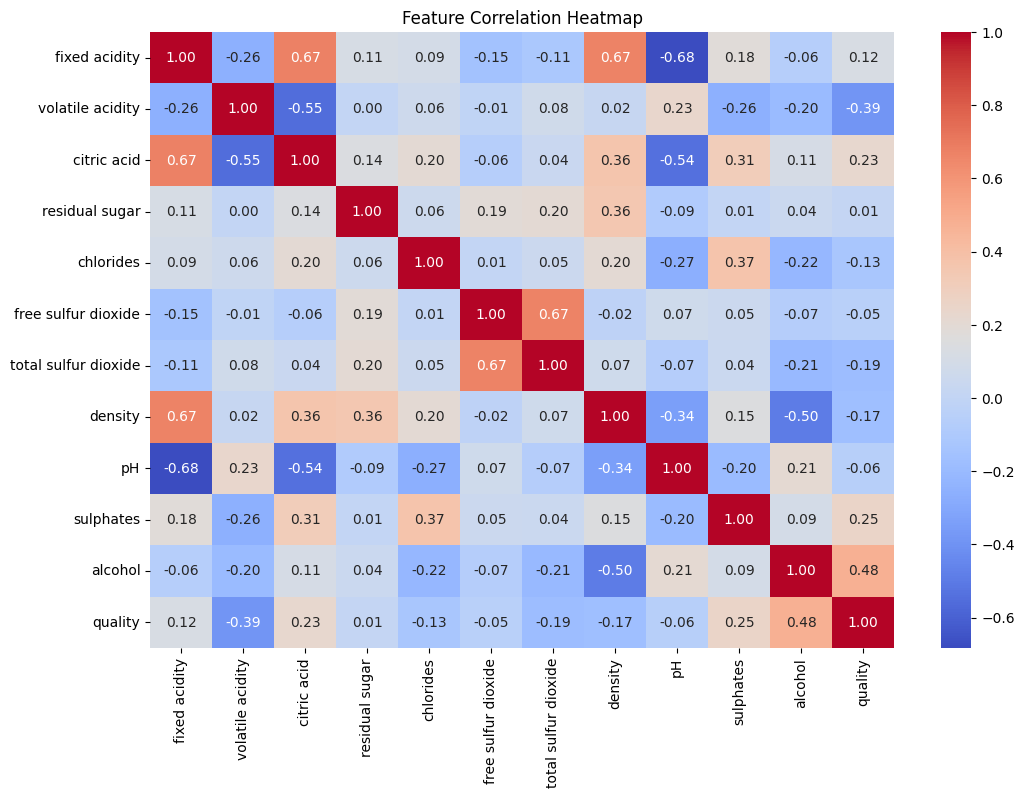

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


###Inferenece

**Alcohol shows strong corelation with the quality and citric acid shows the correlation with the fixed acidity**

In [8]:
# we can see the quality's range is from 3 to 8 max ,lets distribute to  low(0) mid(1) high(2)
bins = [ 0, 5.5 , 7.5 , 10] # this means
labels = [0,1,2]
df['quality'] = pd.cut(df['quality'] , bins=bins , labels=labels)

In [10]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,classification_report


x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()   # preprocessing tool that standardizes your features by removing the mean and scaling to unit variance.
x = sc.fit_transform(x)

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 , random_state = 42)

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(classification_report(y_test, pred))
cross_val = cross_val_score(estimator=knn , X=x_train , y=y_train , cv=10)
print(cross_val.mean())
# ~ 72 % accuracy not bad :)

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       141
           1       0.69      0.72      0.71       174
           2       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.45      0.45      0.45       320
weighted avg       0.67      0.68      0.67       320

0.7138656496062993
